# Loading the data

In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# Preparing the data

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# Building the network

In [7]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

# Validating using K-Fold

In [8]:
import numpy as np
k = 4 
num_val_samples = len(train_data) //k
num_epochs = 100
all_scores = []
for i in range(k):
    print("proscessing fold #",i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples ]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1)* num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1)* num_val_samples:]],
    axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs = num_epochs, batch_size=1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

proscessing fold # 0
proscessing fold # 1
proscessing fold # 2
proscessing fold # 3


In [9]:
all_scores

[2.0956787838794217, 2.220593797098292, 2.859968412040484, 2.40535704039111]

In [10]:
np.mean(all_scores)

2.3953995083523267

In [11]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples ]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1)* num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i+1)* num_val_samples:]],
    axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data = (val_data, val_targets),
             epochs = num_epochs, batch_size=1, verbose = 0)
    mae_history = history.history["val_mean_absolute_error"]
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
average_mae_history =  [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[4.796260059469998,
 3.388225793838501,
 3.061261262043868,
 2.7476447242321353,
 2.7998103446299485,
 2.702343683431644,
 2.6392762507542527,
 2.632178488344249,
 2.5623979651101743,
 2.591890333902718,
 2.4918291250077806,
 2.73268716996259,
 2.51499601637963,
 2.3989537942527543,
 2.4315659527731417,
 2.4221466260381264,
 2.4789625984607357,
 2.445201838370597,
 2.3615977386436837,
 2.502184274173019,
 2.3844499647027195,
 2.3553783220819904,
 2.3178680863710914,
 2.3412851390272085,
 2.5048771034372916,
 2.3332848182999264,
 2.2873882232326093,
 2.4079614659347155,
 2.320796873309825,
 2.454474385422055,
 2.373777892329905,
 2.4964356823722915,
 2.3511503214883334,
 2.464973581899511,
 2.4350132647127207,
 2.283075195727962,
 2.390160874565049,
 2.3347674336763893,
 2.311058547237132,
 2.3839510378271047,
 2.271318539534465,
 2.302581204046117,
 2.313345808794003,
 2.3027099111292624,
 2.236249124649728,
 2.4793803113521915,
 2.282469912330703,
 2.351853847503662,
 2.35422618790428

# Plot the graph

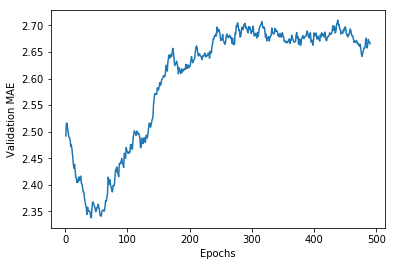

In [21]:
import matplotlib.pyplot as plt
def smooth_curve(points,factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history) +1 ), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')
plt.show()

In [22]:
model = build_model()
model.fit(train_data,train_targets,
         epochs = 80, batch_size = 16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)

Epoch 1/80
404/404 [==============================] - 0s 567us/step - loss: 488.9382 - mean_absolute_error: 20.2068
Epoch 2/80
404/404 [==============================] - 0s 98us/step - loss: 301.2434 - mean_absolute_error: 15.1075
Epoch 3/80
404/404 [==============================] - 0s 96us/step - loss: 133.8663 - mean_absolute_error: 9.2199
Epoch 4/80
404/404 [==============================] - 0s 95us/step - loss: 60.7304 - mean_absolute_error: 5.9218
Epoch 5/80
404/404 [==============================] - 0s 92us/step - loss: 39.0962 - mean_absolute_error: 4.6488
Epoch 6/80
404/404 [==============================] - 0s 98us/step - loss: 29.9842 - mean_absolute_error: 4.0176
Epoch 7/80
404/404 [==============================] - 0s 91us/step - loss: 25.1362 - mean_absolute_error: 3.5857
Epoch 8/80
404/404 [==============================] - 0s 107us/step - loss: 21.8741 - mean_absolute_error: 3.3603
Epoch 9/80
404/404 [==============================] - 0s 90us/step - loss: 19.7994 - mean

404/404 [==============================] - 0s 95us/step - loss: 6.2762 - mean_absolute_error: 1.7594
Epoch 74/80
404/404 [==============================] - 0s 92us/step - loss: 5.9617 - mean_absolute_error: 1.7408
Epoch 75/80
404/404 [==============================] - 0s 87us/step - loss: 5.9965 - mean_absolute_error: 1.7352
Epoch 76/80
404/404 [==============================] - 0s 91us/step - loss: 6.0507 - mean_absolute_error: 1.7329
Epoch 77/80
404/404 [==============================] - 0s 93us/step - loss: 6.2264 - mean_absolute_error: 1.7229
Epoch 78/80
404/404 [==============================] - 0s 84us/step - loss: 5.9066 - mean_absolute_error: 1.6972
Epoch 79/80
404/404 [==============================] - 0s 85us/step - loss: 6.0953 - mean_absolute_error: 1.7769
Epoch 80/80
102/102 [==============================] - 0s 581us/step
